In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [9]:
# !curl -O https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/data/haarcascades/haarcascade_frontalface_default.xml

In [10]:
face_cascade = cv2.CascadeClassifier("../models/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("../models/haarcascade_eye.xml")

In [12]:
cap = cv2.VideoCapture(0)
while True:
    ret,img = cap.read()
    gray_img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    faces = face_cascade.detectMultiScale(gray_img,1.3,5)
    for x,y,w,h in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),5)
    face_gray = gray_img[y:y+h,x:x+w]
    face_color = img[y:y+h,x:x+w]
    eyes = eye_cascade.detectMultiScale(face_gray)
    for xe,ye,we,he in eyes:
        cv2.rectangle(face_color,(xe,ye),(xe+we,ye+he),(0,255,0),3)

    # Resize the frame to a smaller size
    width = 740
    height = 480
    resized_frame = cv2.resize(img, (width, height))

    # Display the resized frame
    cv2.imshow('Resized Webcam Feed', resized_frame)
    key = cv2.waitKey(30) & 0xff
    if key == 27:
        break
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

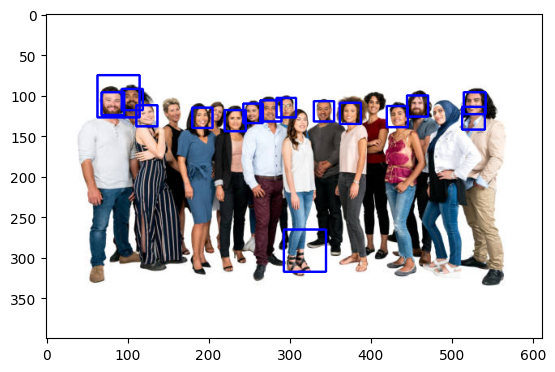

In [19]:
img = cv2.imread('../multi-faces.jpg')
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray_img,1.01,5)
for x,y,w,h in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
face_gray = gray_img[y:y+h,x:x+w]
face_color = img[y:y+h,x:x+w]
eyes = eye_cascade.detectMultiScale(face_gray,1.6,3)
for xe,ye,we,he in eyes:
    cv2.rectangle(face_color,(xe,ye),(xe+we,ye+he),(0,255,0),1)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

# # Wait indefinitely for a key press
# cv2.waitKey(0)

# # Destroy all OpenCV windows
# cv2.destroyAllWindows()

In [8]:
## Opencv do not has GPU support. Forget about training from scratch